In [1]:
import config, src
import numpy as np
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.utils.class_weight import compute_class_weight

In [13]:
data = src.load_data(config.PROCESSED_DATA_FILE)

X_train, X_test, y_train, y_test = src.split_data(data, target_column='music_genre')

class_weight = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight = dict(zip(np.unique(y_train), class_weight))

Données chargées avec succès.


In [14]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

----------------------------------------------------------------------------------------------------

Global accuracy : 0.5121
Global log loss : 1.371111121890334
Global precision : 0.5135117424169076
Global recall : 0.5140446947547472
Global F1 score : 0.5094496879741242
Global ROC-AUC score : 0.8968978010567461

              Precision    Recall  F1 score
Alternative   0.364449  0.364087  0.364268
Anime         0.615548  0.558994  0.585910
Blues         0.482564  0.501469  0.491835
Classical     0.768087  0.811518  0.789206
Country       0.438436  0.534483  0.481718
Electronic    0.593487  0.559960  0.576237
Hip-Hop       0.440208  0.510553  0.472778
Jazz          0.469274  0.341117  0.395062
Rap           0.465050  0.316505  0.376661
Rock          0.498014  0.641760  0.560823

----------------------------------------------------------------------------------------------------


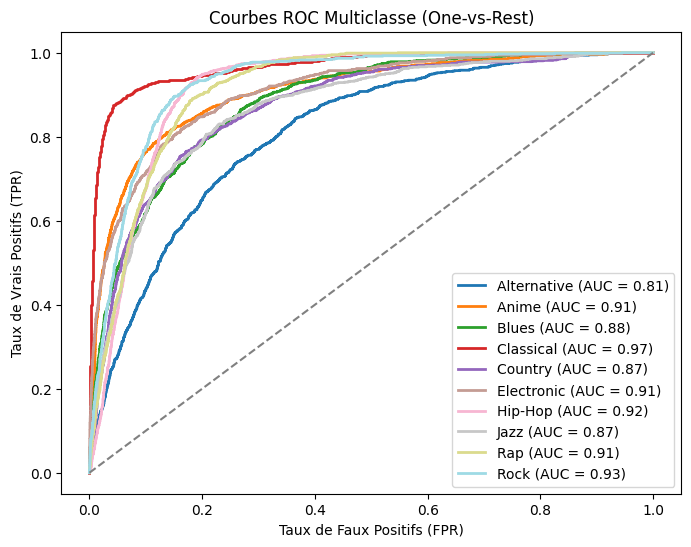

----------------------------------------------------------------------------------------------------


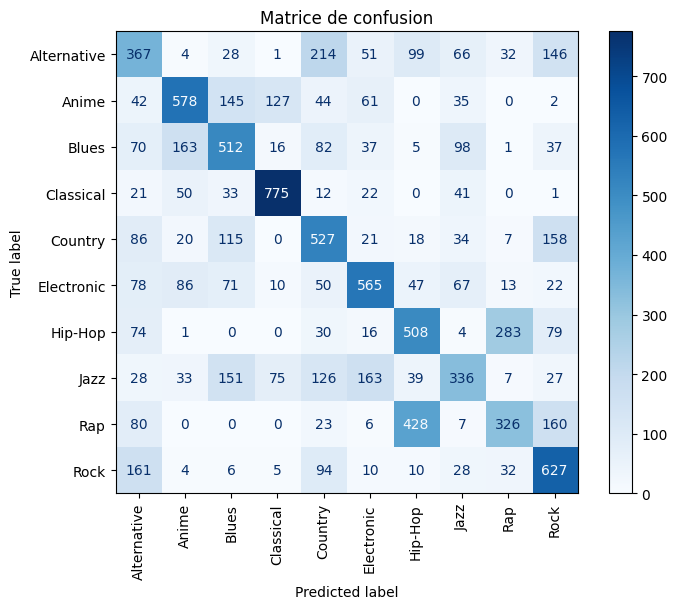

----------------------------------------------------------------------------------------------------


In [16]:
src.evaluate_model(clf, X_test, y_test, classes=config.CLASSES)

In [10]:
data = src.load_data(config.PROCESSED_DATA_COMBINED_RAP_HIPHOP_FILE)

X_train, X_test, y_train, y_test = src.split_data(data, target_column='music_genre')

class_weight = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight = dict(zip(np.unique(y_train), class_weight))

Données chargées avec succès.


In [11]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

----------------------------------------------------------------------------------------------------

Global accuracy : 0.587
Global log loss : 1.2321636482744573
Global precision : 0.5617742010687199
Global recall : 0.5627323996881773
Global F1 score : 0.5595916103362796
Global ROC-AUC score : 0.9003838636092354

              Precision    Recall  F1 score
Alternative   0.374454  0.340278  0.356549
Anime         0.615957  0.559961  0.586626
Blues         0.483779  0.496572  0.490092
Classical     0.767857  0.810471  0.788589
Country       0.446049  0.532454  0.485437
Electronic    0.600432  0.551041  0.574677
Jazz          0.464135  0.335025  0.389151
Rap/Hip-Hop   0.789904  0.811358  0.800487
Rock          0.513400  0.627431  0.564717

----------------------------------------------------------------------------------------------------


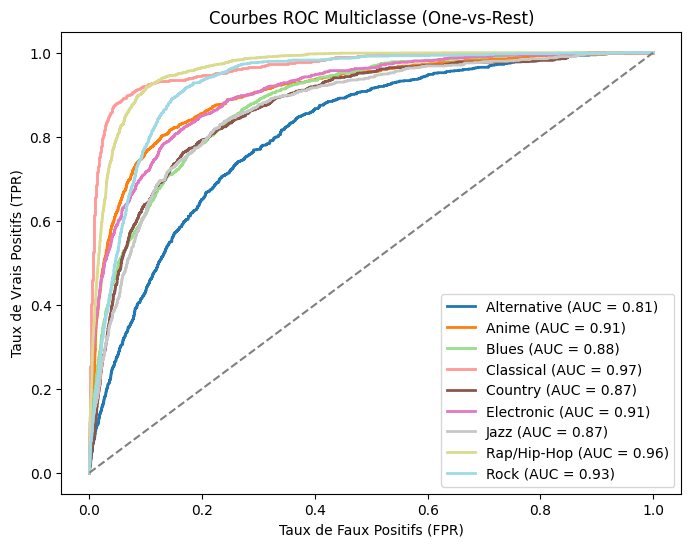

----------------------------------------------------------------------------------------------------


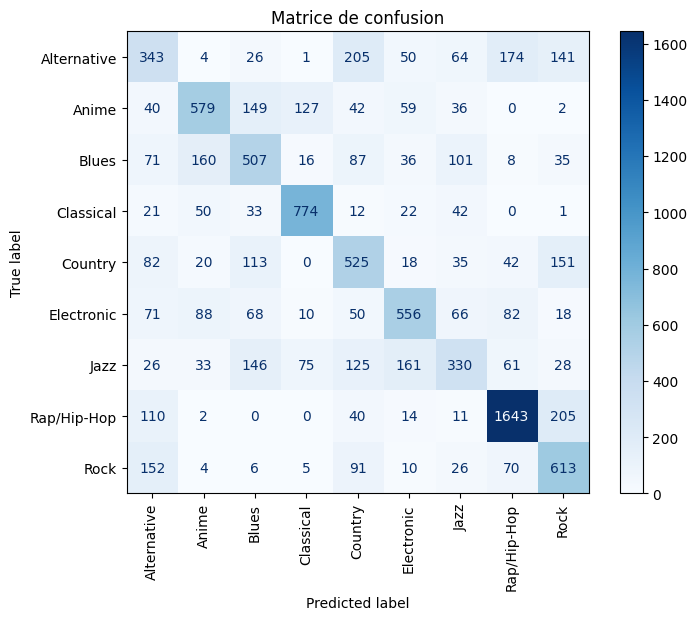

----------------------------------------------------------------------------------------------------


In [12]:
src.evaluate_model(clf, X_test, y_test, classes=config.CLASSES_COMBINED_RAP_HIPHOP)

Nouvelle regression après réduction de dimension, on a une perte de précision de 0.17:

In [4]:
from sklearn.feature_selection import RFE

# Initialize a model and RFE
model = LinearDiscriminantAnalysis().fit(X,y)
rfe = RFE(estimator=model, n_features_to_select=15)

# Fit RFE to the data
X_reduced = rfe.fit_transform(X, y)
print("Selected Features:", X.columns[rfe.support_])

NameError: name 'X' is not defined

In [ ]:
X_=X.loc[:,rfe.support_]

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, stratify=y)
clf = LinearDiscriminantAnalysis().fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy